### Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install plotly

^C


### Loading the dataset

In [2]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\playground-series-s3e3\\train.csv")
#test_df=pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\playground-series-s3e3\\test.csv")


In [3]:
df.head()

id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...            80                 1   
1                        1  ...            80                 1   
2                        3  ...            80                 2   
3                        3  ...            80                 0   
4                        2  ...            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 10                      2               3              10   
1                  4                      3               3               4   
2                  4                      3               3               3   
3                 15                      1               1               6   
4                 31                      0               3              31   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  0                        7                     8          0  
1                  2                        0                     3          0  
2                  2                        1                     2          0  
3                  0                        0                     2          0  
4                 14                        4                    10          1  

[5 rows x 35 columns]

In [4]:
df.shape

(1677, 35)

In [5]:
df.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

### Statisical Analysis

In [9]:
df.describe()

id          Age    DailyRate  DistanceFromHome    Education  \
count  1677.000000  1677.000000  1677.000000       1677.000000  1677.000000   
mean    838.000000    36.036971   892.749553          8.683959     2.937984   
std     484.252517     8.507112   374.496259          7.826143     1.039078   
min       0.000000    18.000000   107.000000          1.000000     1.000000   
25%     419.000000    30.000000   589.000000          2.000000     2.000000   
50%     838.000000    35.000000   890.000000          7.000000     3.000000   
75%    1257.000000    41.000000  1223.000000         12.000000     4.000000   
max    1676.000000    60.000000  3921.000000         29.000000    15.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1677.0              1677.000000  1677.000000     1677.000000   
mean             1.0                 2.757901    67.798450        2.782349   
std              0.0                 1.086835    19.435928        0.650664   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    51.000000        2.000000   
50%              1.0                 3.000000    69.000000        3.000000   
75%              1.0                 4.000000    84.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  StandardHours  StockOptionLevel  TotalWorkingYears  \
count  1677.000000  ...         1677.0       1677.000000        1677.000000   
mean      1.998807  ...           80.0          0.721527          10.709600   
std       1.083065  ...            0.0          0.771259           7.255135   
min       1.000000  ...           80.0          0.000000           0.000000   
25%       1.000000  ...           80.0          0.000000           6.000000   
50%       2.000000  ...           80.0          1.000000           9.000000   
75%       2.000000  ...           80.0          1.000000          14.000000   
max       7.000000  ...           80.0          3.000000          41.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1677.000000      1677.000000     1677.000000   
mean                2.732856         2.769827        6.806798   
std                 1.145271         0.647721        5.883282   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       41.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
count         1677.000000              1677.000000           1677.000000   
mean             4.144305                 1.978533              4.186643   
std              3.583398                 3.045716              3.576189   
min              0.000000                 0.000000              0.000000   
25%              2.000000                 0.000000              2.000000   
50%              3.000000                 1.000000              3.000000   
75%              7.000000                 2.000000              7.000000   
max             18.000000                15.000000             17.000000   

         Attrition  
count  1677.000000  
mean      0.119261  
std       0.324192  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

In [10]:
df.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

### EDA

In [11]:
df_new = df[['BusinessTravel', 'Department', 'Education', 'EducationField',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition']]

In [12]:
for i in df_new.columns:
    print(i,':')
    print('Unique Values:', df_new[i].unique())
    print('Value Counts:')
    print(df_new[i].value_counts())
    print('\n')

BusinessTravel :
Unique Values: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Value Counts:
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64


Department :
Unique Values: ['Research & Development' 'Sales' 'Human Resources']
Value Counts:
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64


Education :
Unique Values: [ 3  4  1  2  5 15]
Value Counts:
3     682
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64


EducationField :
Unique Values: ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Value Counts:
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64


EnvironmentSatisfaction :
Unique Values: [4 1 3 2]
Value Counts:
4    537
3    496
2    345
1    299


Countplot for: BusinessTravel


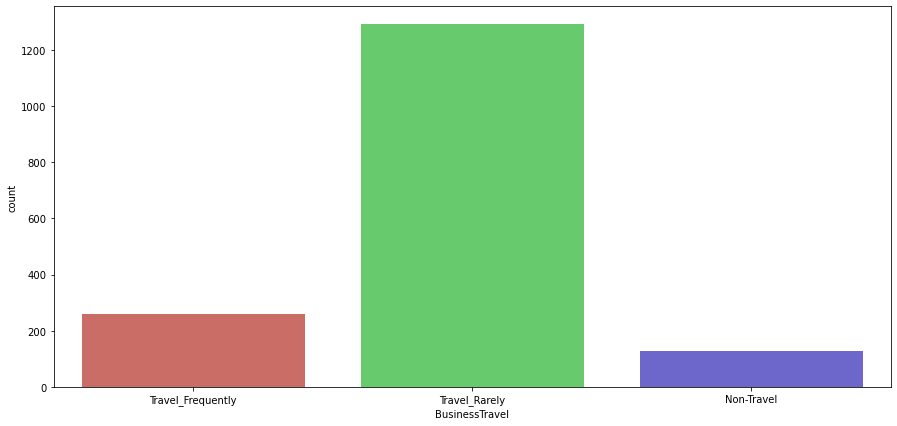



Countplot for: Department


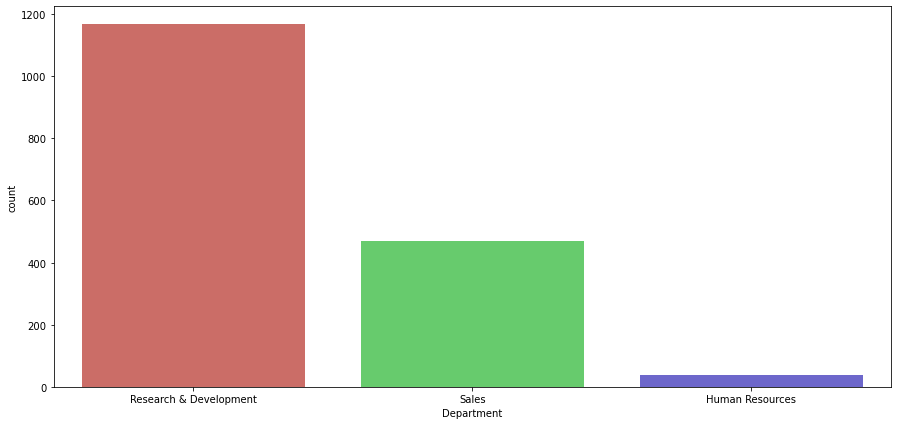



Countplot for: Education


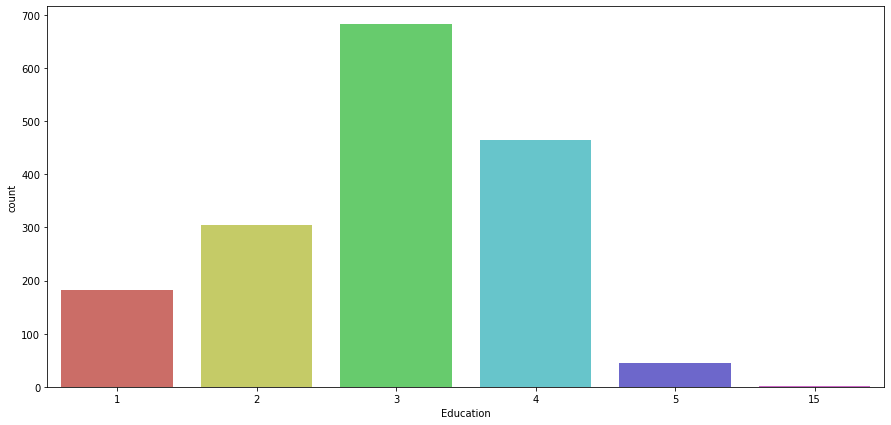



Countplot for: EducationField


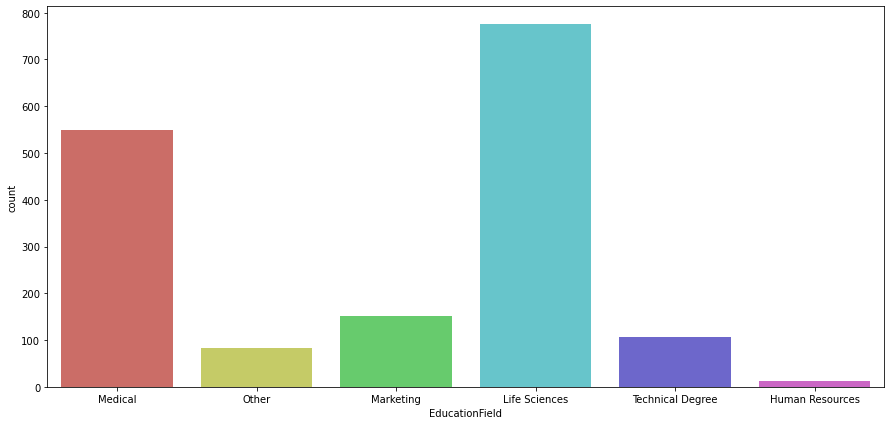



Countplot for: EnvironmentSatisfaction


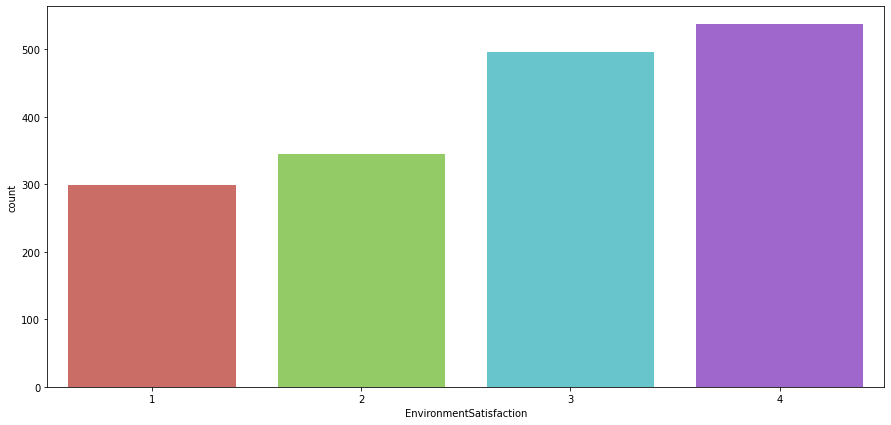



Countplot for: Gender


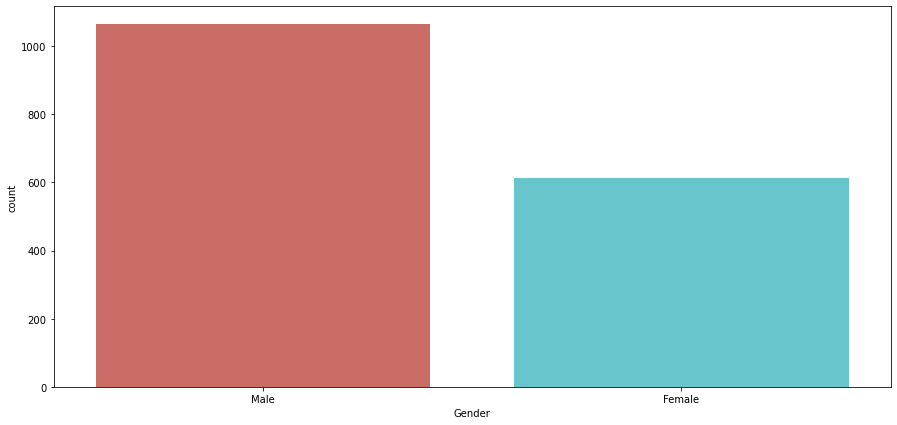



Countplot for: JobInvolvement


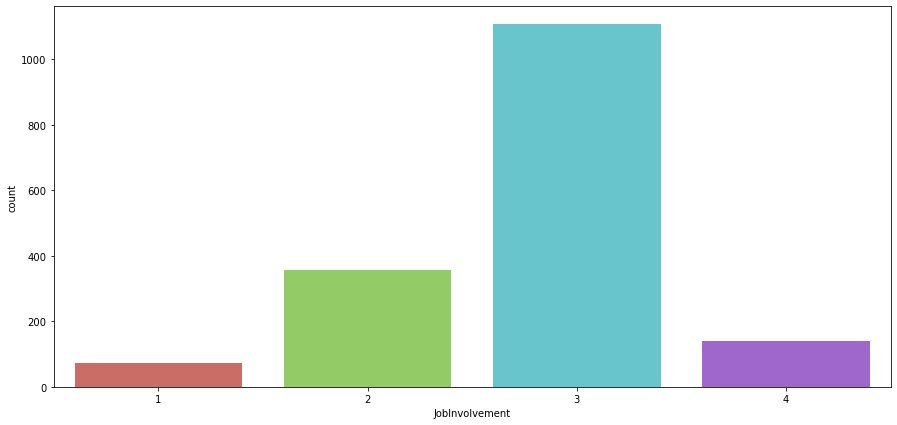



Countplot for: JobRole


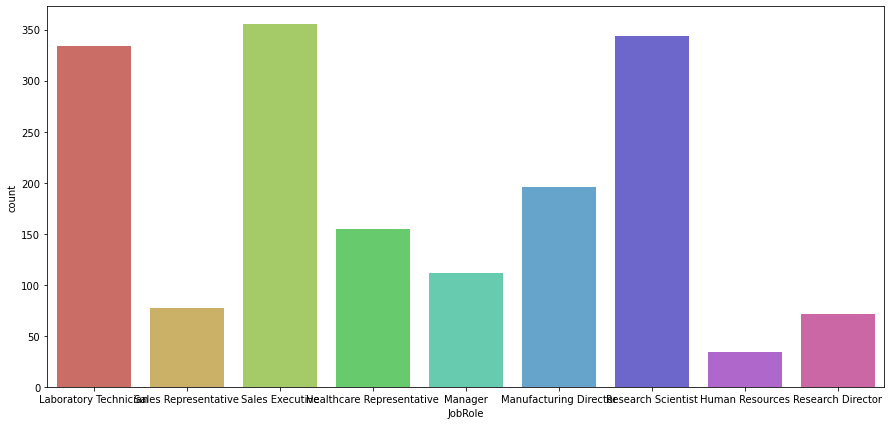



Countplot for: JobSatisfaction


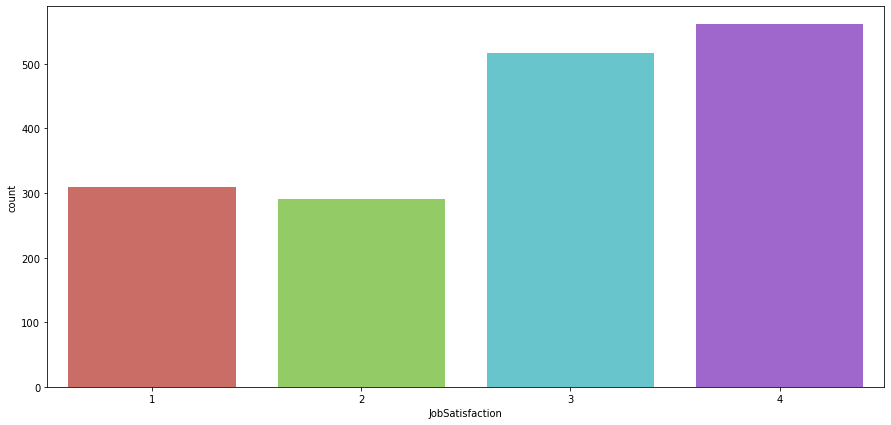



Countplot for: MaritalStatus


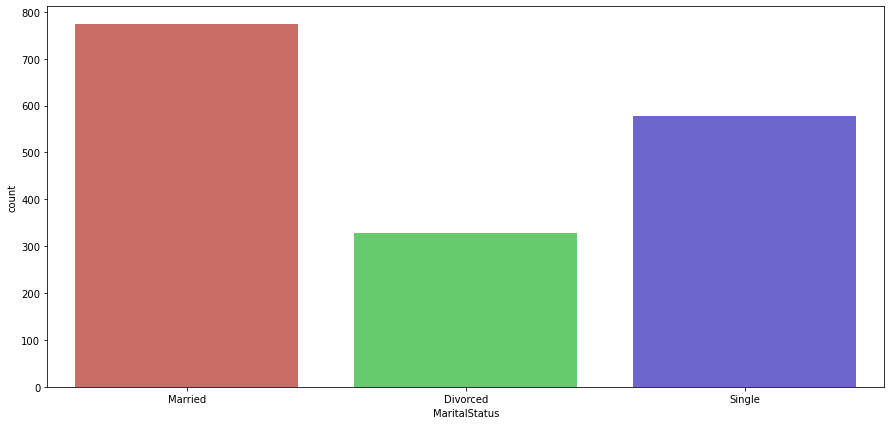



Countplot for: NumCompaniesWorked


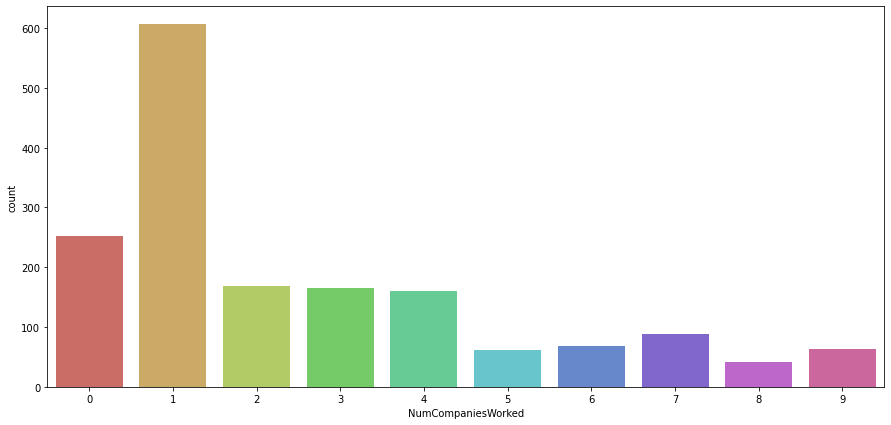



Countplot for: OverTime


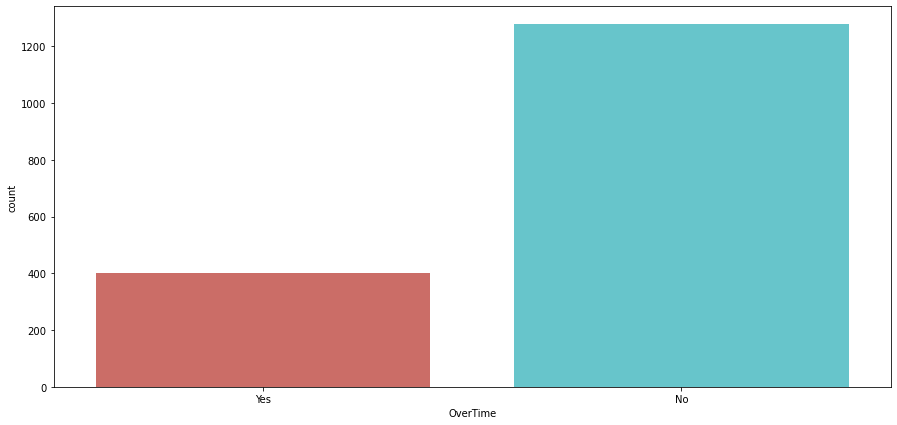



Countplot for: PerformanceRating


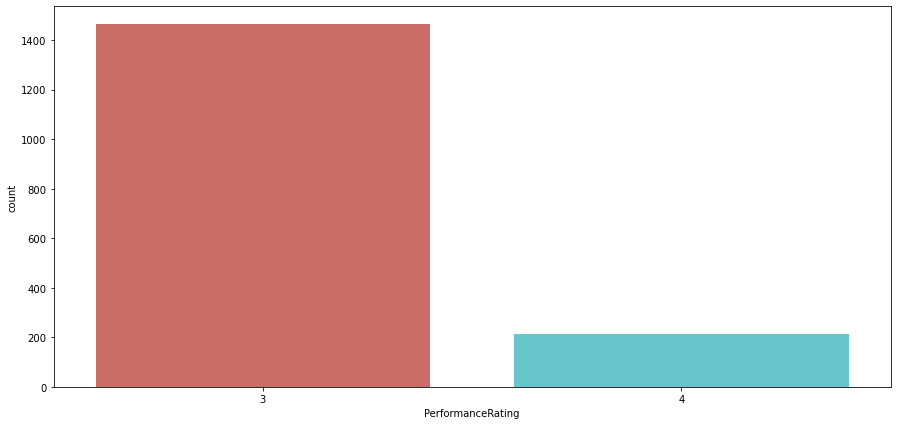



Countplot for: RelationshipSatisfaction


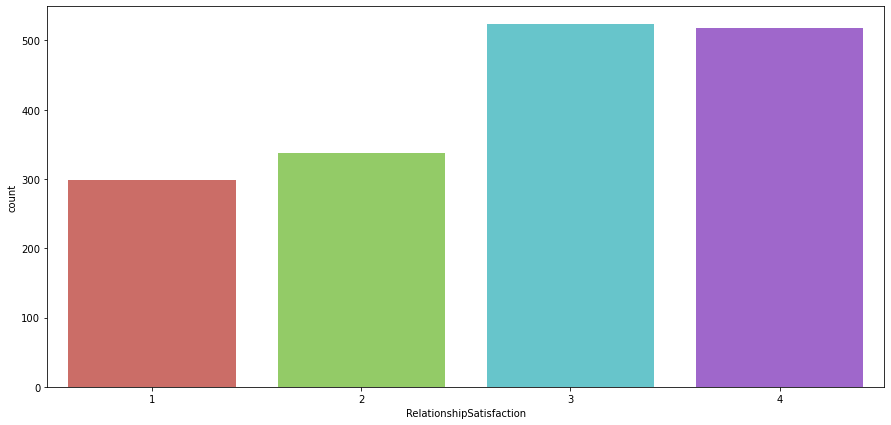



Countplot for: StockOptionLevel


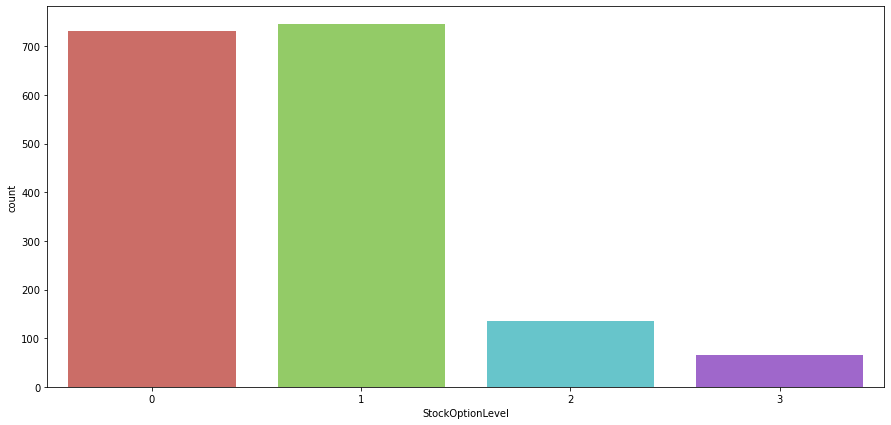



Countplot for: TrainingTimesLastYear


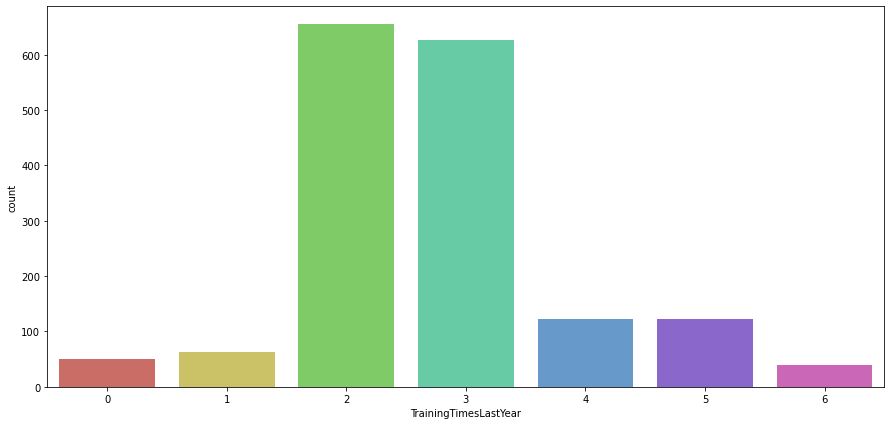



Countplot for: WorkLifeBalance


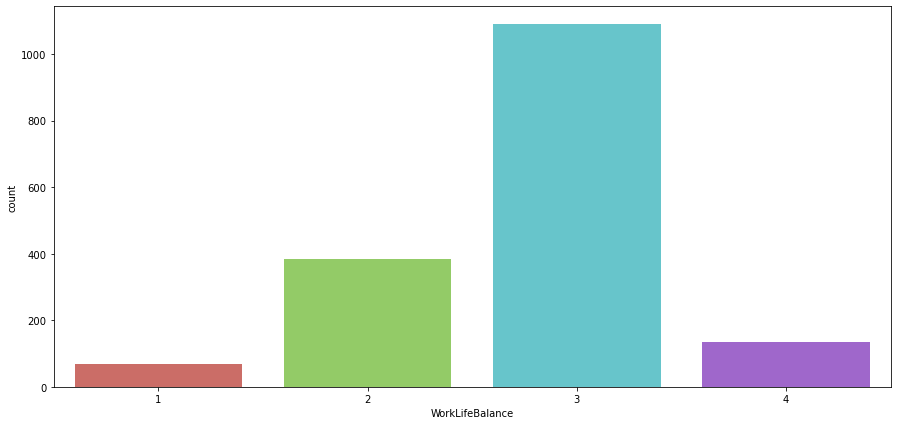



Countplot for: Attrition


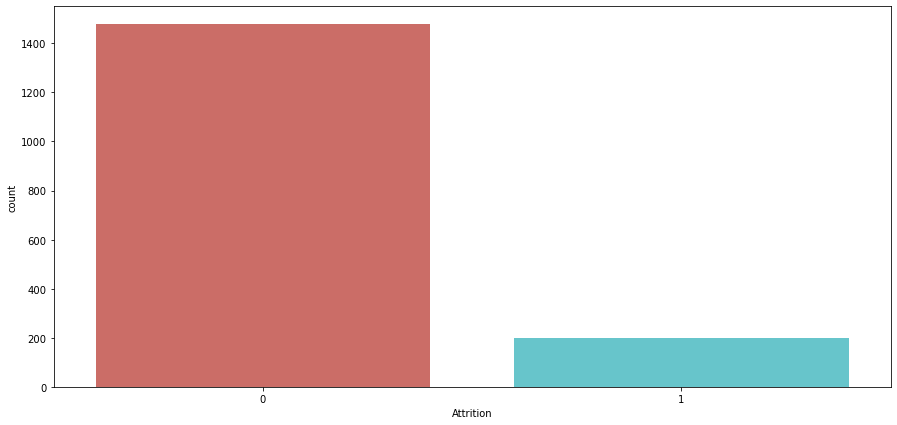

In [13]:

for i in df_new.columns:
    plt.figure(figsize=[15,7],)
    print('Countplot for:', i)
    sns.countplot(df_new[i], data = df_new, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()
    print('\n')

In [14]:
int_cols = [col for col in df.columns if df[col].dtype == 'int64']
print('Integer columns:', int_cols)

print('\n')

obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print('Object columns:', obj_cols)

Integer columns: ['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


Object columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


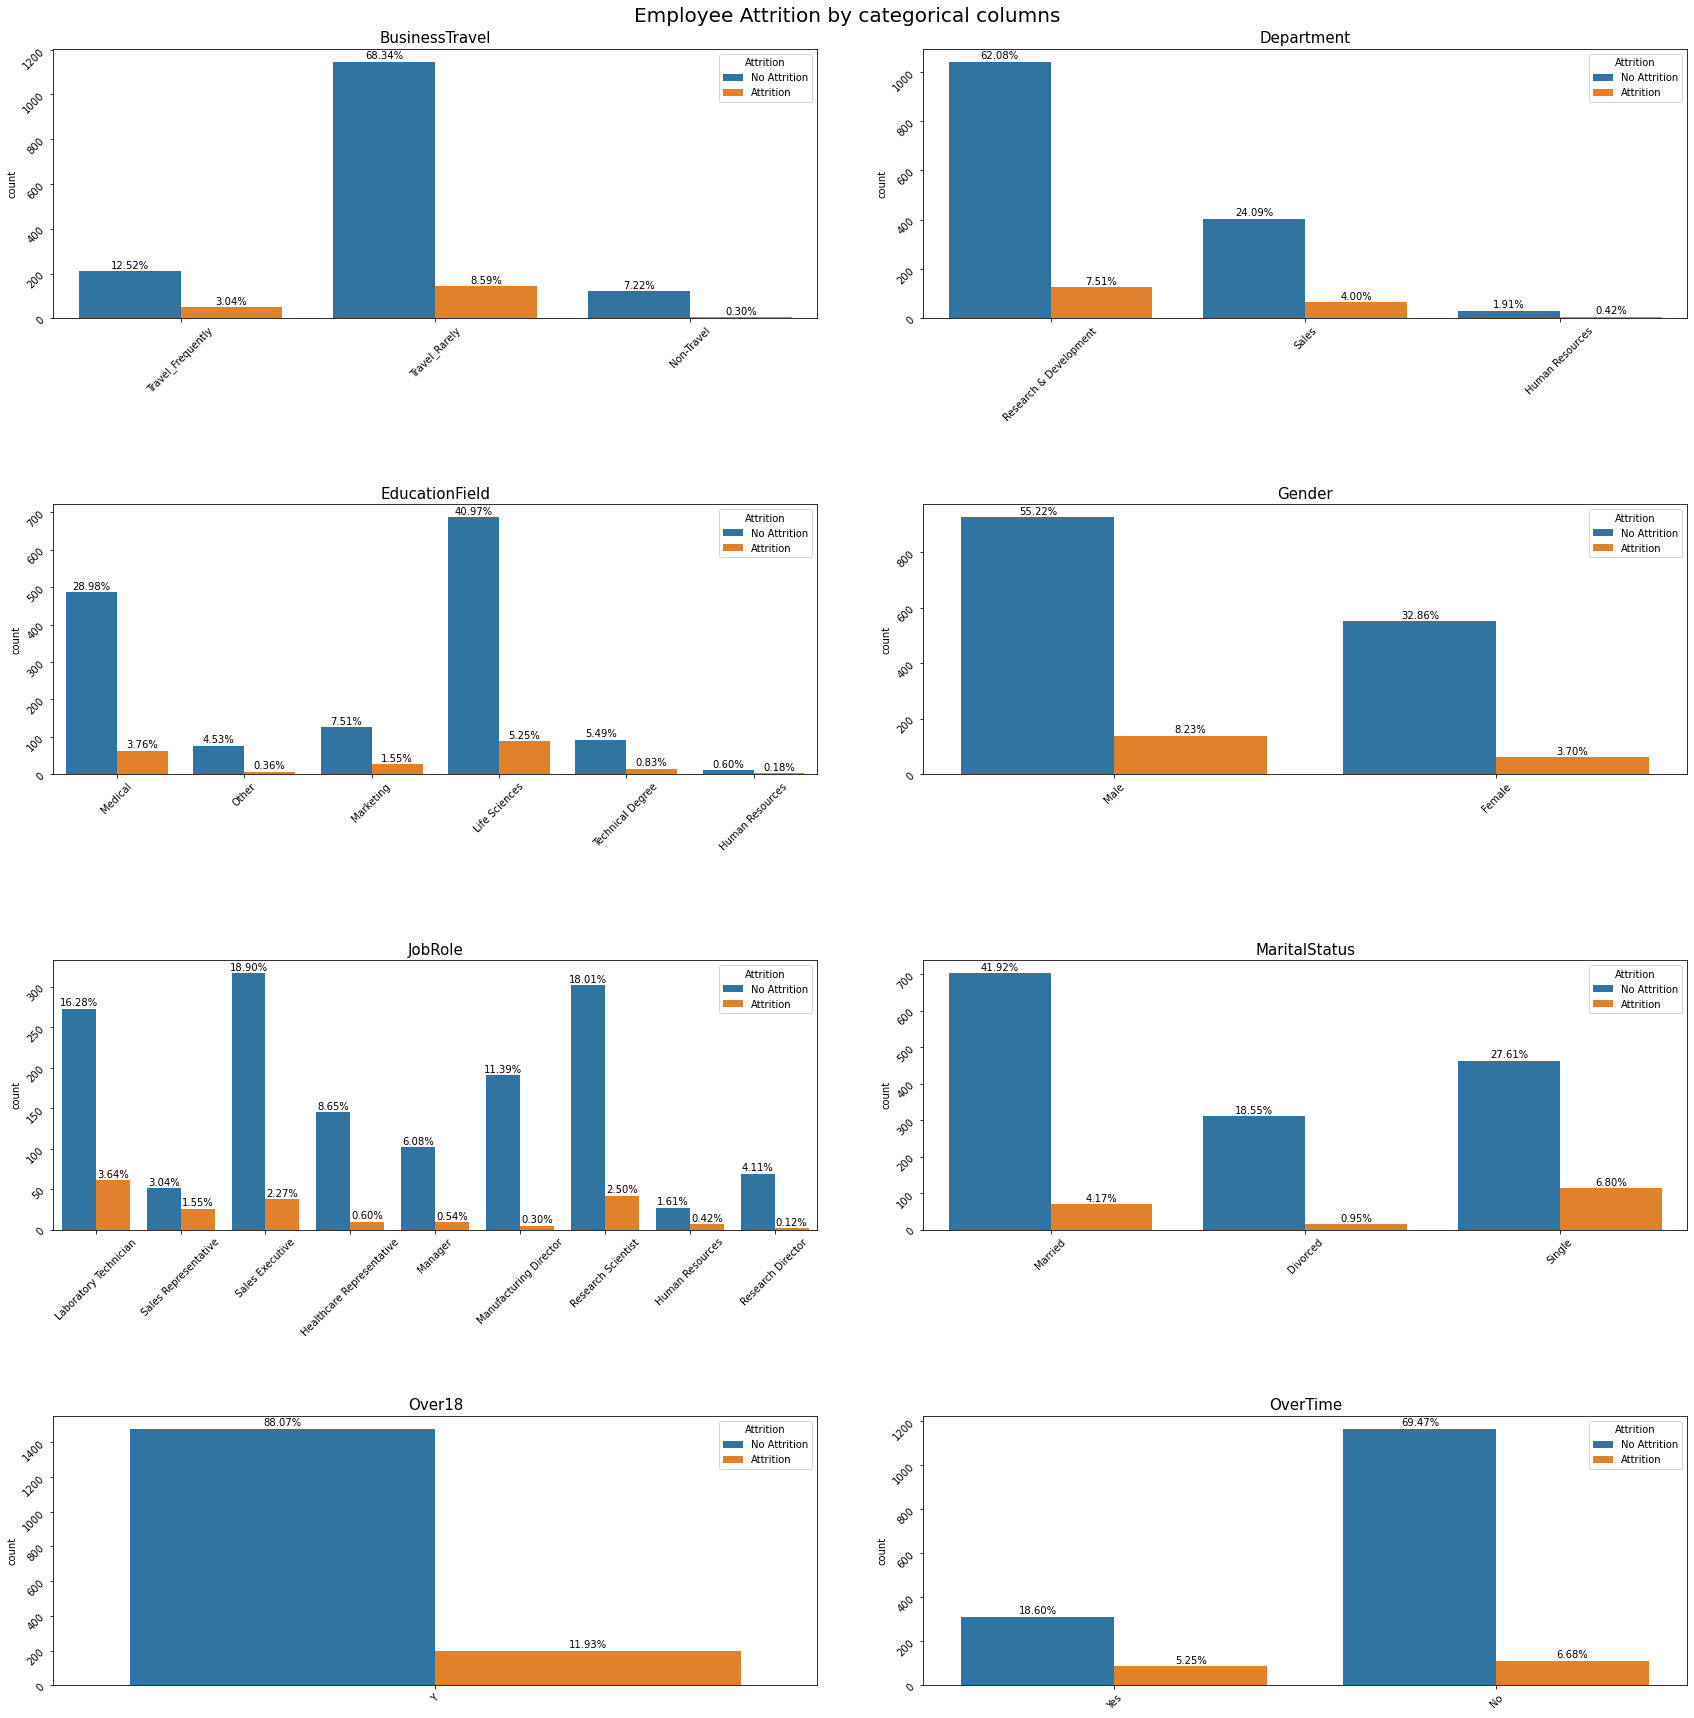

In [15]:
fig , ax = plt.subplots(4,2,figsize=(25,25))
total = len(df)
ax =  np.ravel(ax)

for i , col in enumerate(obj_cols):
  sns.countplot(ax=ax[i],x=df[col],hue=df['Attrition'])
  ax[i].tick_params(labelrotation=45)
  ax[i].set_title(f"{col}",fontsize=15)
  ax[i].legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
  ax[i].set(xlabel=None)
  
  for p in ax[i].patches:
    percentage = f'{100*p.get_height()/total:.2f}%\n'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[i].annotate(percentage, (x,y),ha='center',va='center')


fig.suptitle("Employee Attrition by categorical columns",fontsize = 20)
fig.tight_layout(pad = 6)
plt.show()
  

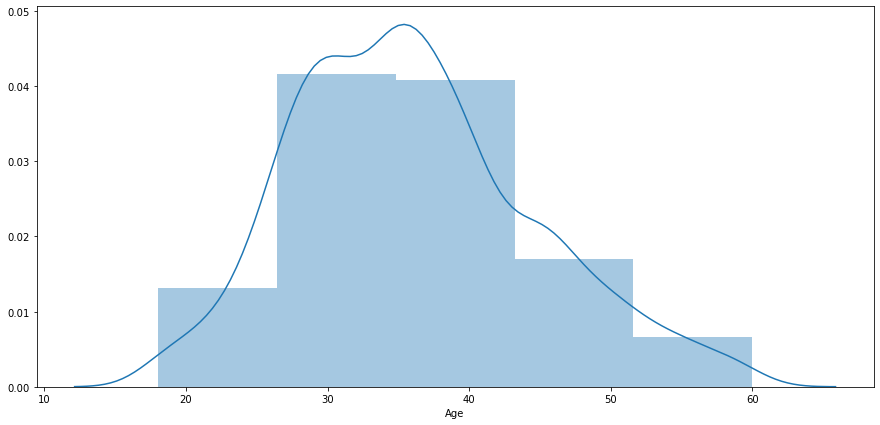

In [19]:
plt.figure(figsize=[15,7],)
sns.distplot(df['Age'], kde = 'True', bins = 5)
plt.xticks(rotation = 0)
plt.show()

In [21]:
fig=px.box(df,x='Attrition',y='Age')
fig.show()

In [24]:
for i in int_cols:
    fig=px.box(df,x='Attrition',y=i)
    fig.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [26]:
df.head()

id  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   0   36               1        599           1                24   
1   1   35               2        921           2                 8   
2   2   32               2        718           2                26   
3   3   38               2       1488           1                 2   
4   4   50               2       1017           1                 5   

   Education  EducationField  EmployeeCount  EnvironmentSatisfaction  ...  \
0          3               3              1                        4  ...   
1          3               4              1                        1  ...   
2          3               2              1                        3  ...   
3          3               3              1                        3  ...   
4          4               3              1                        2  ...   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 1                 10                      2   
1             80                 1                  4                      3   
2             80                 2                  4                      3   
3             80                 0                 15                      1   
4             80                 0                 31                      0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3              10                   0   
1                3               4                   2   
2                3               3                   2   
3                1               6                   0   
4                3              31                  14   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                        7                     8          0  
1                        0                     3          0  
2                        1                     2          0  
3                        0                     2          0  
4                        4                    10          1  

[5 rows x 35 columns]

In [27]:
corr=df.corr()

In [28]:
corr

id       Age  BusinessTravel  DailyRate  \
id                        1.000000  0.027563       -0.031831   0.003572   
Age                       0.027563  1.000000        0.017462   0.039686   
BusinessTravel           -0.031831  0.017462        1.000000  -0.015708   
DailyRate                 0.003572  0.039686       -0.015708   1.000000   
Department                0.014652 -0.014663       -0.020004   0.025107   
DistanceFromHome          0.007871 -0.049025        0.005933   0.024168   
Education                -0.015997  0.223545       -0.018889  -0.007035   
EducationField           -0.007152 -0.018181        0.004240  -0.021046   
EmployeeCount                  NaN       NaN             NaN        NaN   
EnvironmentSatisfaction   0.044271  0.029557       -0.002002   0.006483   
Gender                    0.014820 -0.031498       -0.019574   0.015338   
HourlyRate               -0.018994  0.030628        0.051914  -0.001213   
JobInvolvement           -0.016039  0.002101        0.026406  -0.026725   
JobLevel                  0.021245  0.479015        0.002184   0.041369   
JobRole                  -0.035070 -0.102034       -0.006113   0.006331   
JobSatisfaction          -0.002511 -0.009273       -0.004297  -0.037459   
MaritalStatus             0.051459 -0.091312        0.030960  -0.008254   
MonthlyIncome            -0.005224  0.470758        0.019567   0.027375   
MonthlyRate               0.036047  0.010959       -0.044104  -0.013332   
NumCompaniesWorked       -0.022619  0.300044        0.007145  -0.017337   
Over18                         NaN       NaN             NaN        NaN   
OverTime                 -0.044391 -0.016417        0.010134   0.001339   
PercentSalaryHike        -0.036811 -0.060012       -0.024196  -0.020007   
PerformanceRating        -0.018226 -0.021206       -0.057984  -0.045213   
RelationshipSatisfaction  0.018472  0.056115       -0.013382   0.001315   
StandardHours                  NaN       NaN             NaN        NaN   
StockOptionLevel         -0.041337  0.064863       -0.047337   0.021273   
TotalWorkingYears        -0.004288  0.648047        0.008332   0.058044   
TrainingTimesLastYear     0.010423  0.014303        0.031099  -0.023140   
WorkLifeBalance          -0.006236  0.034138       -0.012355   0.025152   
YearsAtCompany           -0.020820  0.306628       -0.040091   0.066057   
YearsInCurrentRole       -0.020064  0.219880       -0.079881   0.057011   
YearsSinceLastPromotion  -0.002203  0.204357       -0.021144   0.037035   
YearsWithCurrManager     -0.005955  0.201601       -0.064886   0.040969   
Attrition                -0.006598 -0.161044        0.000552  -0.022380   

                          Department  DistanceFromHome  Education  \
id                          0.014652          0.007871  -0.015997   
Age                        -0.014663         -0.049025   0.223545   
BusinessTravel             -0.020004          0.005933  -0.018889   
DailyRate                   0.025107          0.024168  -0.007035   
Department                  1.000000          0.029781   0.013881   
DistanceFromHome            0.029781          1.000000  -0.011436   
Education                   0.013881         -0.011436   1.000000   
EducationField             -0.065715         -0.023405  -0.019603   
EmployeeCount                    NaN               NaN        NaN   
EnvironmentSatisfaction    -0.000465          0.004959  -0.011189   
Gender                     -0.020542         -0.003123   0.027398   
HourlyRate                  0.000948          0.006191   0.014862   
JobInvolvement             -0.003713          0.010035   0.052390   
JobLevel                    0.138378         -0.051008   0.085823   
JobRole                     0.643463          0.026561  -0.002808   
JobSatisfaction            -0.015714          0.026309  -0.030686   
MaritalStatus               0.006123          0.002864  -0.054694   
MonthlyIncome               0.099545         -0.061019   0.081054   
MonthlyRate         

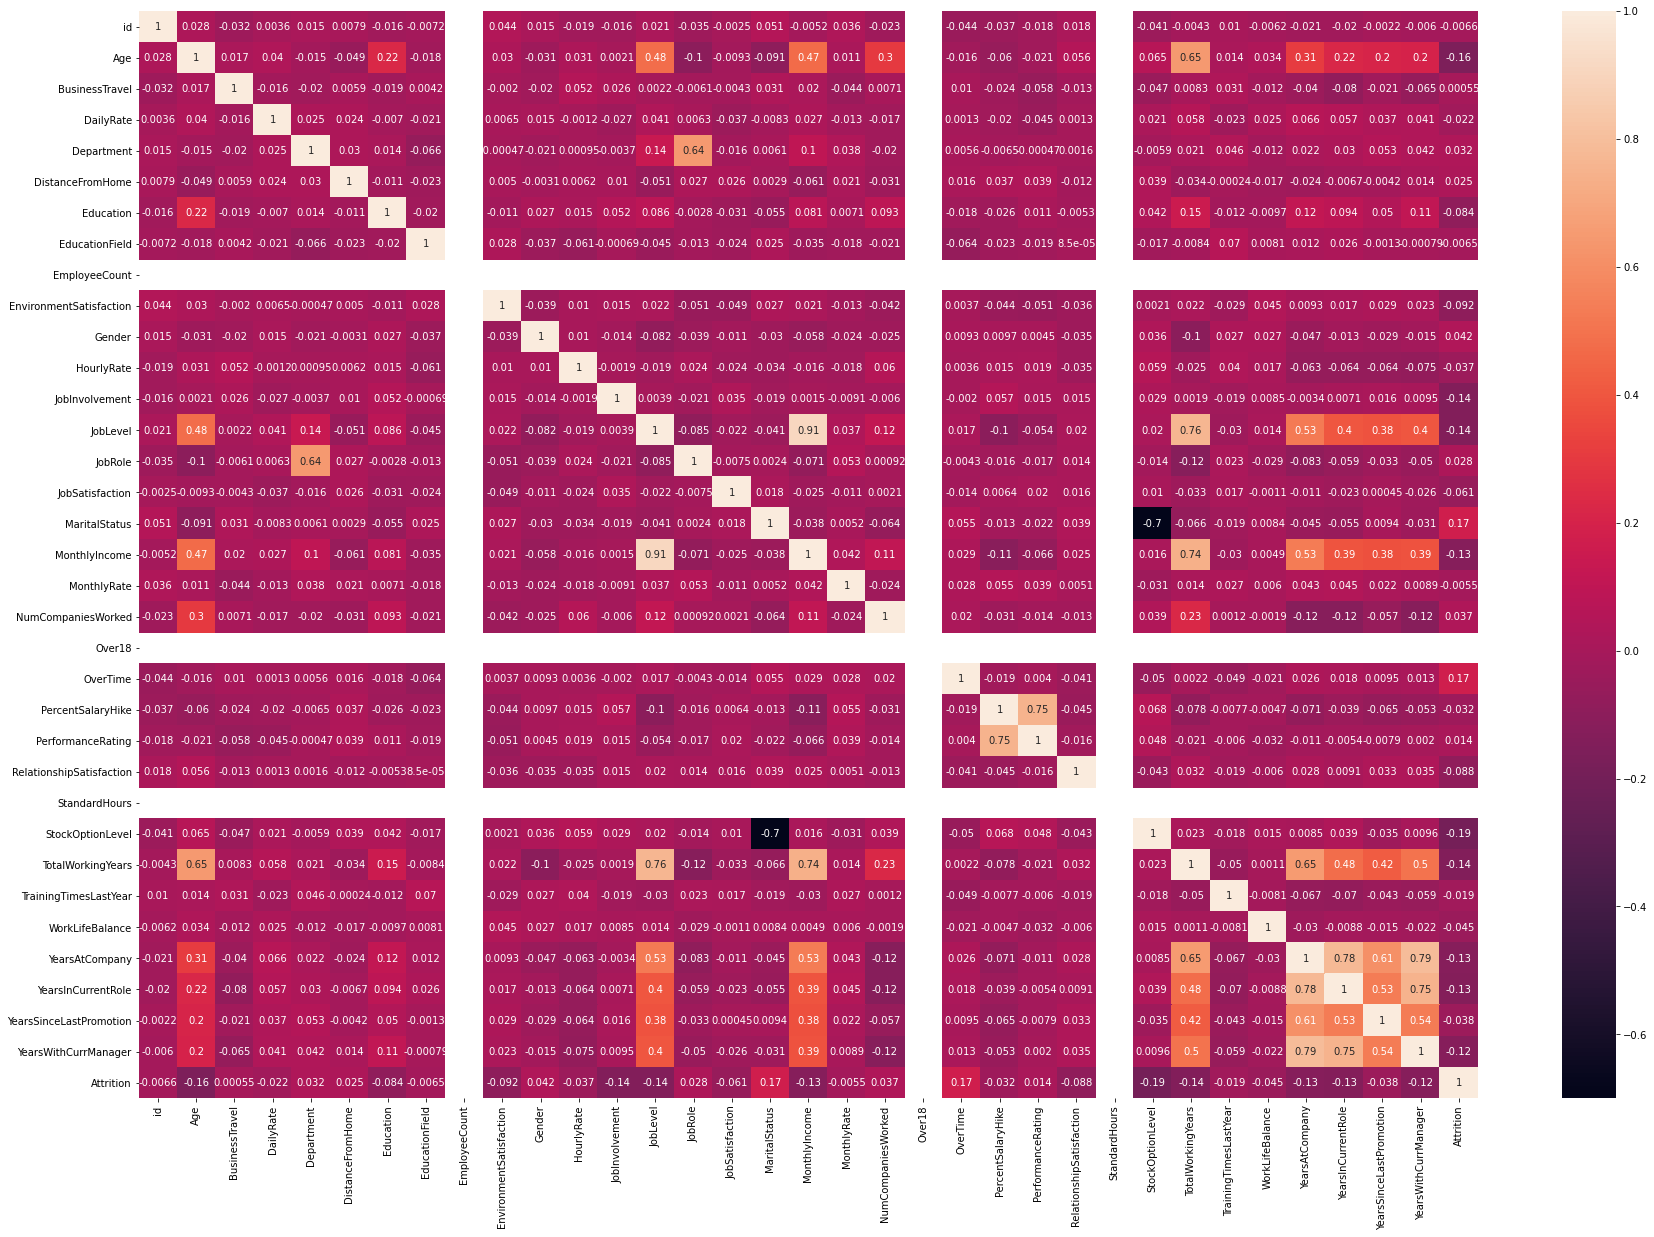

In [29]:
plt.figure(figsize=[30,20],)
sns.heatmap(corr, annot = True)
plt.show()

### Pre-Processing

In [30]:
df1=df.copy()

In [31]:
X= df1.drop(['Attrition','id'], axis = 1)
y = df1['Attrition']

In [32]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.042269   0.02398993 0.03564624 0.02247353 0.03321284 0.02994139
 0.03171691 0.         0.03588105 0.02008016 0.03742518 0.042747
 0.02539803 0.03267252 0.03167279 0.03196052 0.04524717 0.03487517
 0.03349443 0.         0.04166286 0.03609822 0.01242543 0.03602351
 0.         0.0432018  0.03884712 0.03132757 0.02997566 0.03948066
 0.03695813 0.02853062 0.03476455]


In [34]:
X = df1.iloc[:,:-1]

In [37]:
X.drop("id",axis=1,inplace=True)

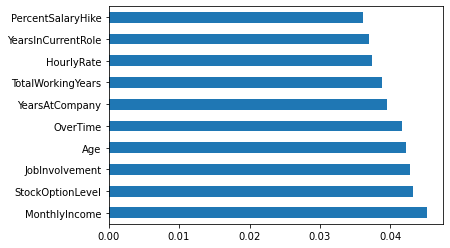

In [38]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [39]:
X_new = X[['StockOptionLevel', 'MonthlyIncome', 'JobInvolvement', 'OverTime',
          'Age', 'YearsInCurrentRole', 'YearsAtCompany', 'TotalWorkingYears',
           'PercentSalaryHike','HourlyRate']]

In [40]:
X_new.shape

(1677, 10)

In [41]:
y.shape

(1677,)

### Model Building

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X_new, y, test_size= 0.30, random_state=0)

In [43]:
from sklearn.linear_model import LogisticRegression  
log_r= LogisticRegression(random_state=0)  
log_r.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred_lr= log_r.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, y_pred_lr)

0.873015873015873

In [49]:
from sklearn.metrics import confusion_matrix  
cm=confusion_matrix(y_test, y_pred_lr)

In [50]:
cm

array([[438,   1],
       [ 63,   2]], dtype=int64)

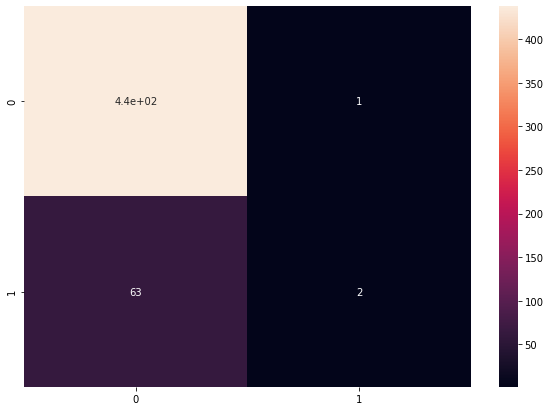

In [51]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       439
           1       0.67      0.03      0.06        65

    accuracy                           0.87       504
   macro avg       0.77      0.51      0.50       504
weighted avg       0.85      0.87      0.82       504



In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred_dt= dt.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred_dt)

0.8214285714285714

In [56]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred_dt)

In [57]:
cm

array([[396,  43],
       [ 47,  18]], dtype=int64)

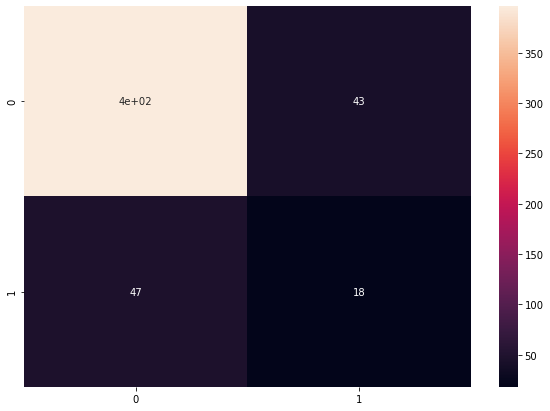

In [58]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [59]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       439
           1       0.30      0.28      0.29        65

    accuracy                           0.82       504
   macro avg       0.59      0.59      0.59       504
weighted avg       0.82      0.82      0.82       504



In [60]:
from sklearn.ensemble import RandomForestClassifier  
rf_c = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_c.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [61]:
y_pred_rf_c= rf_c.predict(X_test)  

In [62]:
accuracy_score(y_test, y_pred_rf_c)

0.8591269841269841

In [63]:
cm= confusion_matrix(y_test, y_pred_rf_c) 

In [64]:
cm

array([[432,   7],
       [ 64,   1]], dtype=int64)

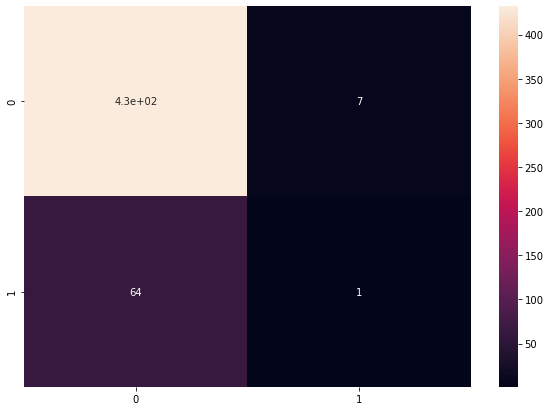

In [65]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [66]:
print(classification_report(y_test, y_pred_rf_c))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       439
           1       0.12      0.02      0.03        65

    accuracy                           0.86       504
   macro avg       0.50      0.50      0.48       504
weighted avg       0.77      0.86      0.81       504



In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [69]:
def grid_search(model,folds,params,scoring):
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [71]:
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [72]:
log_reg = LogisticRegression()
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)
grid_search_log.fit(X_train, y_train)
print_best_score_params(grid_search_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.4s


Best Score:  0.8866121112929622
Best Hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.5s finished


In [73]:
dtc= DecisionTreeClassifier(random_state=40)
dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')
grid_search_dtc.fit(X_train, y_train)
print_best_score_params(grid_search_dtc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  65 out of  80 | elapsed:    1.1s remaining:    0.2s


Best Score:  0.7315967491088264
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 10}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.3s finished


In [74]:
rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')
grid_search_rfc.fit(X_train, y_train)
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.3min finished


OOB SCORE : 0.8942881500426257


In [75]:
y_pred_grid_rfc = grid_search_rfc.predict(X_test)

In [76]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
37/37 [==============================] - 1s 3ms/step - loss: 211.9045 - accuracy: 0.7110
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 29.3362 - accuracy: 0.8397
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 2.5464 - accuracy: 0.7664
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 2.4504 - accuracy: 0.7852
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 7.0085 - accuracy: 0.8031
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 2.6475 - accuracy: 0.8082
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 5.3217 - accuracy: 0.8005
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 8.4453 - accuracy: 0.7860
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 7.3151 - accuracy: 0.8252
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 7.4843 - accuracy: 0.8346
Epoch 11/50
37/3

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 5ms/step - loss: 2.0904 - accuracy: 0.8690
Test accuracy: 0.8690476417541504


In [81]:
df2=pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\playground-series-s3e3\\test.csv")



In [82]:
df2['BusinessTravel'] = le.fit_transform(df2['BusinessTravel'])
df2['Department'] = le.fit_transform(df2['Department'])
df2['EducationField'] = le.fit_transform(df2['EducationField'])
df2['JobRole'] = le.fit_transform(df2['JobRole'])
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['MaritalStatus'] = le.fit_transform(df2['MaritalStatus'])
df2['Over18'] = le.fit_transform(df2['Over18'])
df2['OverTime'] = le.fit_transform(df2['OverTime'])

In [83]:
X_new = X[['StockOptionLevel', 'MonthlyIncome', 'JobInvolvement', 'OverTime',
          'Age', 'YearsInCurrentRole', 'YearsAtCompany', 'TotalWorkingYears',
           'PercentSalaryHike','HourlyRate']]

In [84]:
X = scaler.fit_transform(X_new)

In [85]:
y_lr = grid_search_log.predict(X)

In [86]:
y_lr

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [87]:
y_dt = grid_search_dtc.predict(X_new)

In [88]:
y_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [89]:
y_rfc = grid_search_rfc.predict(X_new)

In [90]:
y_rfc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [91]:
y_nn = model.predict(X_new)


53/53 [==============================] - 0s 2ms/step


In [92]:
y_nn

array([[2.7489226e-04],
       [5.9431593e-05],
       [7.1034357e-08],
       ...,
       [7.2457123e-04],
       [1.3855038e-10],
       [1.3872936e-04]], dtype=float32)